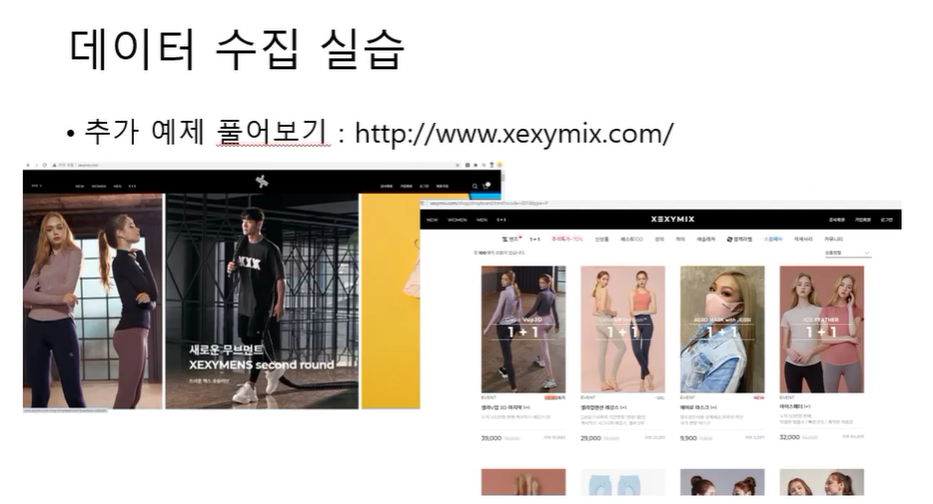

# 태그(문자열) 제거: extract()

예제 1

In [2]:
import requests
from bs4 import BeautifulSoup

In [9]:
markup = '<p>김딩코의 데이터세상 <b>티스토리</b></p>'
soup = BeautifulSoup(markup, 'html.parser')
mydata = soup.p
print(mydata.get_text())

print(soup.p.get_text())
print(soup.b.get_text())

김딩코의 데이터세상 티스토리
김딩코의 데이터세상 티스토리
티스토리


#### p 태그안의 b태그 제외

In [13]:
markup = '<p>김딩코의 데이터세상 <b>티스토리</b></p>'
soup = BeautifulSoup(markup, 'html.parser')

soup.b.extract() # b태그 안의 내용을 가져와라. 그리고 추출해라.
print(soup.get_text())

김딩코의 데이터세상 


### 예제2 -extract()는 특정 태그(문자열)을 반환

In [29]:
markup = '<a href="http://example.com/">I linked to <i>example.com</i></a>'
soup = BeautifulSoup(markup) # 파싱
a_tag = soup.a # a태그 묶인 부분 가져오기
print(a_tag)

<a href="http://example.com/">I linked to <i>example.com</i></a>


In [30]:
i_tag = soup.i.extract()
print(i_tag)

<i>example.com</i>


In [31]:
print(a_tag)

<a href="http://example.com/">I linked to </a>


### 제거할 태그가 없는 상태에서 제거하려할 경우 에러 발생

In [32]:
#soup.i.extract()

# .parent 부모 태그를 찾아야 할 때

In [19]:
markup = '<a href="http://example.com/">I linked to <i>example.com</i></a>'
soup = BeautifulSoup(markup) # 파싱
tag = soup.i
print("TAG: ",tag)
print("PARENT_TAG: ",tag.parent)  # 부모 태그

TAG:  <i>example.com</i>
PARENT_TAG:  <a href="http://example.com/">I linked to <i>example.com</i></a>


In [20]:
print(tag.string) # tag.get_text()와 동일

example.com


In [21]:
print(tag.string.extract()) # 두 번 실행시켜보자! # 잘라내기 개념

example.com


In [22]:
print(tag) # extract() 후

<i></i>


### 예제3_여러 부분에서 제거해야하는 경우 (갯수가 맞아야 함)

In [27]:
markup = '''
    <a href="http://naver.com/">네이버<i>홈페이지</i></a>
    <a href="http://mju.ac.kr/">명지대<i>홈페이지</i></a>
    <a href="http://hongik.ac.kr/">홍익대<i>홈페이지</i></a>
    '''
soup = BeautifulSoup(markup)
mydata = soup.find_all('a') # a태그를 전부 가져와라.
print(mydata)

[<a href="http://naver.com/">네이버<i>홈페이지</i></a>, <a href="http://mju.ac.kr/">명지대<i>홈페이지</i></a>, <a href="http://hongik.ac.kr/">홍익대<i>홈페이지</i></a>]


In [28]:
for item in mydata:
    soup.i.extract()

print(mydata)

[<a href="http://naver.com/">네이버</a>, <a href="http://mju.ac.kr/">명지대</a>, <a href="http://hongik.ac.kr/">홍익대</a>]


## 중간에 하나라도 태그가 비는 경우 에러 발생!

-----------

# 도전문제! [젝시믹스 웹크롤링]

In [34]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.xexymix.com/shop/shopbrand.html?xcode=020&type=Y')
soup = BeautifulSoup(res.content)

myprice = soup.find_all('li','prd-price')

for item in myprice:
    print(item.get_text())

32,000
78,000
59,000
118,000
49,000
98,000
29,000
58,000
32,000
56,000
53,000
49,000
58,000
39,000
78,000
32,000
58,000
39,000
78,000
29,000
78,000
53,000
11,900
16,000
42,000
52,000
13,900
19,000
69,000
89,000
29,000
52,000
54,000
68,000
12,900
17,700
34,000
58,000
48,000
78,000
53,000
29,000
38,000
29,000
35,500
54,000
103,000
49,000
64,000
9,900
11,800
29,000
58,000
48,000
60,000
69,000
89,000
48,000
58,000
69,000
89,000
8,900
29,000
39,000
69,000
89,000
29,000
49,000
53,000
38,000
8,500
29,000
53,000
49,000
39,000
109,000
39,000
59,000
8,900
53,000
44,000
54,000
79,000
99,000
21,000
31,000
55,000
78,000
29,000
32,000
49,000
103,000
33,000
90,000
98,000
39,000
72,000
19,000
28,000
69,000
89,000
34,000
9,900
15,800
39,000
68,000
19,000
29,000
29,000
39,000
39,000
109,000
28,000
31,000
29,000
39,000
21,000
31,000
49,000
128,000
33,000
9,900
12,000
53,000
28,000
38,000
19,000
29,000
44,000
77,000
19,000
28,000
79,000
99,000
44,000
9,900
11,000
39,000
58,000
88,000
108,000
29,000
49,000

## 군데군데 원하지 않는 정보 확인됨.

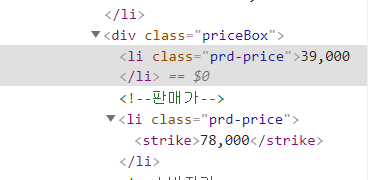

### 삭제하고 싶은 정보는 strike 태그에 포함.

In [35]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.xexymix.com/shop/shopbrand.html?xcode=020&type=Y')
soup = BeautifulSoup(res.content)

strikes = soup.find_all('strike') # 스트라이크 태그 추출
for strike in strikes:
    soup.strike.extract()
    
myprice = soup.find_all('li','prd-price')
for item in myprice:
    print(item.get_text())

32,000

59,000

49,000

29,000

32,000

53,000
49,000

39,000

32,000

39,000

29,000

53,000
11,900

42,000

13,900

69,000

29,000

54,000

12,900

34,000

48,000

53,000
29,000

29,000

54,000

49,000

9,900

29,000

48,000

69,000

48,000

69,000

8,900
29,000

69,000

29,000

53,000
38,000
8,500

53,000
49,000
39,000

39,000

8,900
53,000
44,000

79,000

21,000

55,000

29,000

49,000

33,000
90,000

39,000

19,000

69,000

34,000
9,900

39,000

19,000

29,000

39,000

28,000

29,000

21,000

49,000

33,000
9,900

53,000
28,000

19,000

44,000

19,000

79,000

44,000
9,900

39,000

88,000

29,000

49,000

79,000

29,000

29,000

49,000
79,000

19,000

21,000

24,000

19,000
42,000
19,000

29,000

34,000
29,000

19,000

18,000

29,000

18,000

29,000

39,000


In [36]:
myprice = soup.find_all('li','prd-price')
for item in myprice:
    print(item)

<li class="prd-price">32,000</li>
<li class="prd-price"></li>
<li class="prd-price">59,000</li>
<li class="prd-price"></li>
<li class="prd-price">49,000</li>
<li class="prd-price"></li>
<li class="prd-price">29,000</li>
<li class="prd-price"></li>
<li class="prd-price">32,000</li>
<li class="prd-price"></li>
<li class="prd-price">53,000</li>
<li class="prd-price">49,000</li>
<li class="prd-price"></li>
<li class="prd-price">39,000</li>
<li class="prd-price"></li>
<li class="prd-price">32,000</li>
<li class="prd-price"></li>
<li class="prd-price">39,000</li>
<li class="prd-price"></li>
<li class="prd-price">29,000</li>
<li class="prd-price"></li>
<li class="prd-price">53,000</li>
<li class="prd-price">11,900</li>
<li class="prd-price"></li>
<li class="prd-price">42,000</li>
<li class="prd-price"></li>
<li class="prd-price">13,900</li>
<li class="prd-price"></li>
<li class="prd-price">69,000</li>
<li class="prd-price"></li>
<li class="prd-price">29,000</li>
<li class="prd-price"></li>
<l

군데군데 띄어진 이유는 위처럼 strike가 있었던 자리의 값이 사라지고 태그의 흔적만 남아 위처럼 빈 값이 존재함.
이는 df로 변환할 때 문제가 됨. 따라서 parent tag를 사용

In [39]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.xexymix.com/shop/shopbrand.html?xcode=020&type=Y')
soup = BeautifulSoup(res.content)

strikes = soup.find_all('strike') # 스트라이크 태그 추출
for strike in strikes:
    soup.strike.parent.extract()   # 이 부분이 달라짐.
    
myprice = soup.find_all('li','prd-price')
for item in myprice:
    print(item.get_text())
    print(item)

32,000
<li class="prd-price">32,000</li>
59,000
<li class="prd-price">59,000</li>
49,000
<li class="prd-price">49,000</li>
29,000
<li class="prd-price">29,000</li>
32,000
<li class="prd-price">32,000</li>
53,000
<li class="prd-price">53,000</li>
49,000
<li class="prd-price">49,000</li>
39,000
<li class="prd-price">39,000</li>
32,000
<li class="prd-price">32,000</li>
39,000
<li class="prd-price">39,000</li>
29,000
<li class="prd-price">29,000</li>
53,000
<li class="prd-price">53,000</li>
11,900
<li class="prd-price">11,900</li>
42,000
<li class="prd-price">42,000</li>
13,900
<li class="prd-price">13,900</li>
69,000
<li class="prd-price">69,000</li>
29,000
<li class="prd-price">29,000</li>
54,000
<li class="prd-price">54,000</li>
12,900
<li class="prd-price">12,900</li>
34,000
<li class="prd-price">34,000</li>
48,000
<li class="prd-price">48,000</li>
53,000
<li class="prd-price">53,000</li>
29,000
<li class="prd-price">29,000</li>
29,000
<li class="prd-price">29,000</li>
54,000
<li class

In [43]:
prices = []
for i in myprice:
    prices.append(i.get_text())

In [46]:
import pandas as pd

In [48]:
pd.DataFrame(prices, columns=["판매가"])

,판매가
0,"32,000"
1,"59,000"
2,"49,000"
3,"29,000"
4,"32,000"
...,...
95,"18,000"
96,"29,000"
97,"18,000"
98,"29,000"


strike는 자식 태그로 상위태그(부모태그)인 li태그 전체를 날려버림.

# 여러 페이지에 대한 웹크롤링

## G-market

In [52]:
import requests
from bs4 import BeautifulSoup

# 3개의 주소를 입력
site_list = ["http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01",
            "http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02",
            "http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03"]

product_list = []

for site in site_list:
    res = requests.get(site)
    soup = BeautifulSoup(res.content)
    mydata = soup.find_all('a','itemname')
    print(site)
    for item in mydata:
        print(item.get_text())
        product_list.append(item.get_text())
        

http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01





앙투/봄신상/원피스/44~110/빅사이즈/루즈핏/니트
글램공감/브라1+팬티2/속옷세트/A~D컵/빅사이즈
메이킹유 봄신상 원피스/블라우스/맨투맨/니트가디건
[테이트]TATE 후드/니트 외 베스트
수맘 봄 간절기 신상입고 홈웨어 잠옷 세트
프라이데이 봄신상 빅세일 맨투맨/후드티/빅사이즈
55~88 간절기점퍼/맥코트/트렌치/니트/팬츠
요즘에/봄신상+10%/청바지/슬랙스/면팬츠/밴딩/3XL~
[머스트비]머스트비 봄 신상품 OPEN / 프리시즌 특가 세일
시크루즈/봄신상/12%/홈웨어/원피스/팬츠/빅사이즈
[반에이크][모다아울렛]반에이크 백화점동일상품 봄오픈 특가 1만원대부터
다온샵/봄신상+10%즉시/청바지/배기/슬랙스/빅사이즈
브리치X리틀마켓 10% F/W 팬츠/니트/아우터
폴로 랄프로렌 봄시즌 카라티셔츠 2종 택1 (UO)/ 폴로랄프로렌
루나샵 20일딱하루 5900원~봄신상티셔츠/맨투맨/원피
[트라이]여성팬티 5매/여자/여성/속옷/미디/맥시/위생/삼각/면
에이블린/봄신상/원피스/티셔츠/맨투맨/블라우스
패션라인 봄신상 블라우스/원피스/니트/가디건/양털
달리샵 12%세일 봄신상 원피스/니트/가디건/세트
발포지프 맨투맨(GL5TSU861UP)
브리치x바이미쓰리 F/W 니트/맨투맨/아우터
티메이 봄신상 니트 가디건 기모맨투맨 트레이
스위트바니 봄신상 롱원피스/맨투맨/후드/빅사이즈
스웨덴세탁소 봄신상 시즌오프최대76%/롱원피스/니트
프라랑 시즌오프 봄신상 원피스/세트/블라우스/티셔츠
20수 30수 무지 반팔 티셔츠1+1+1 빅사이즈
[디키즈](광주신세계)디키즈 기모후드 6종택1 (DSQ3UTHT441 DSR3UTHT346 DMR3UTHT508 DSQ3UTHT442 DSQ3UTHT430 D...
[이너리즘]1+1 노와이어 심리스누디브라탑 2장 노라인 스포츠브라
체리온 봄신상 롱티/빅사이즈/후드티/맨투맨/빅사이즈
[니]NII 남녀 데님/슬랙스외팬츠류50

In [57]:
import pandas as pd

pd.DataFrame(product_list)[5:]

,0
5,앙투/봄신상/원피스/44~110/빅사이즈/루즈핏/니트
6,글램공감/브라1+팬티2/속옷세트/A~D컵/빅사이즈
7,메이킹유 봄신상 원피스/블라우스/맨투맨/니트가디건
8,[테이트]TATE 후드/니트 외 베스트
9,수맘 봄 간절기 신상입고 홈웨어 잠옷 세트
...,...
310,[구달]구달 청귤 비타C 잡티세럼플러스 더블에디션 기획세트
311,[토니모리]쿠폰+~60% 에너지24맨즈 올인원 스킨케어 헤어 바디
312,[효비담]수려한 효비담 수분샘 크림 75ml 수려한
313,발렌타인데이 러브 특가 84%


# 주소의 패턴을 활용

# 서울대학교 학생식당 메뉴 크롤링

In [58]:
# 학생회관 점심 메뉴 가져오기
import requests
from bs4 import BeautifulSoup
res = requests.get("https://snuco.snu.ac.kr/ko/foodmenu?field_menu_date_value_1%5Bvalue%5D%5Bdate%5D=&field_menu_date_value%5Bvalue%5D%5Bdate%5D=09%2F01%2F2020")

soup = BeautifulSoup(res.content)
mydata = soup.find_all('td','views-field views-field-field-lunch')

# 12개의 클래스 매치 중 2번째 사용

print(mydata[1].get_text())
# 2번째는 맞지만 td가 붙지 않음.

print(mydata[0].get_text())
# 따라서 0번이 맞음, Index를 통해 가져올 수 있다.


부추잡채밥  3,000원
영계백숙  4,500원


목살슬라이스덮밥  5,500원
버섯스크램블에그  1,700원
돌솥낙지연포탕(#)  3,500원



C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [61]:
mydata[1]

<td class="views-field views-field-field-lunch">
<p>부추잡채밥  3,000원<br/>
영계백숙  4,500원</p>
</td>

### 웹사이트 주소의 패턴을 찾아보자!

### 9/1 식단 주소

https://snuco.snu.ac.kr/ko/foodmenu?field_menu_date_value_1%5Bvalue%5D%5Bdate%5D=&field_menu_date_value%5Bvalue%5D%5Bdate%5D=09%2F01%2F2020

### 9/2 식단 주소

https://snuco.snu.ac.kr/ko/foodmenu?field_menu_date_value_1%5Bvalue%5D%5Bdate%5D=&field_menu_date_value%5Bvalue%5D%5Bdate%5D=09%2F02%2F2020

마지막에 09 01 2020 ,  09 02 2020 의 패턴을 찾을 수 있다.

# 7월달 한달치 식단을 크롤링해보자!

In [3]:
# 서울대학교 학생회관 2020년 7월 점심메뉴 가져오기
import requests
from bs4 import BeautifulSoup

# 주소를 31개 생성해야함.
site_pre = 'https://snuco.snu.ac.kr/ko/foodmenu?field_menu_date_value_1%5Bvalue%5D%5Bdate%5D=&field_menu_date_value%5Bvalue%5D%5Bdate%5D=07%2F'
site_post = '%2F2020'

print("7월 학생식당 점심 메뉴")

for date in range(31):
    site = site_pre+str(date+1)+site_post  # 1 ~ 31까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content)
    mydata = soup.find_all('td','views-field views-field-field-lunch')
    print(str(date+1)+"일"+mydata[0].get_text())

7월 학생식당 점심 메뉴


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


1일

콩나물밥&부추양념장(#)  1,700원
돌솥라면사리부대찌개  3,000원

2일
등심돈까스냉메밀  4,500원
메추리알곤약조림(#)  1,700원
 

3일
쇠고기무국  1,700원
갈비덮밥  5,500원

4일
눈꽃치즈뼈없는닭갈비  4,000원

5일
코로나19로 당분간  휴점

6일
비프스트로가노프&피쉬앤칩스  5,500원
조갯살미역국(#)  1,700원
돌솥비빔밥(#)  3,000원

7일
낙지볶음&소면(#)  4,000원
쇠고기무국  1,700원
순살양념치킨  4,000원

8일
뿌팟퐁커리&파인애플볶음밥(#)  5,500원
된장찌개  1,700원
오삼불고기  3,500원

9일
쇠고기쌀국수 3,000원
두부계란부침(#)  1,700원
오리주물럭  4,500원

10일
오코노미온더치킨까스&미니쫄면  5,500원
버섯스크램블에그  1,700원
돌솥추어탕  4,000원

11일
올리브스테이크  4,000원

12일
코로나19로 당분간 휴점

13일
깐소새우&짜장  5,500원
어묵곤약조림(#)  1,700원
돌솥쇠고기육개장  3,000원

14일
고등어김치조림(#)  4,000원
두부버섯찌개  1,700원
야끼도리덮밥&국물떡볶이  5,500원

15일
아보카도명란마요덮밥&육즙함박스테이크  5,500원
북어탕(#)  1,700원
돌솥버섯불고기  4,000원

16일
규동  3,500원
두부카레(#)  1,700원
돌솥영계백숙  4,500원

17일
냉메밀국수(#)  3,500원
제육떡간장볶음  1,700원
너비아니구이  4,000원

18일
눈꽃치즈김치볶음밥  3,500원

19일
코로나19로 당분간 휴점합니다

20일
치킨마요덮밥  3,000원
조갯살미역국백반(#)  1,700원
뚝배기불고기  4,500원

21일
낙지볶음덮밥(#)  4,000원
무장국밥  1,700원
철판삼겹살소금구이정식  5,500원

22일
차돌짬뽕&짜므라이스  5,500원
제육숙주볶음  1,700원
돌솥우렁된장찌개  3,000원

23일
채사랑마파두부덮밥(#)(*)  3,000

# 영화 리뷰를 수집해보자 [인터스텔라]

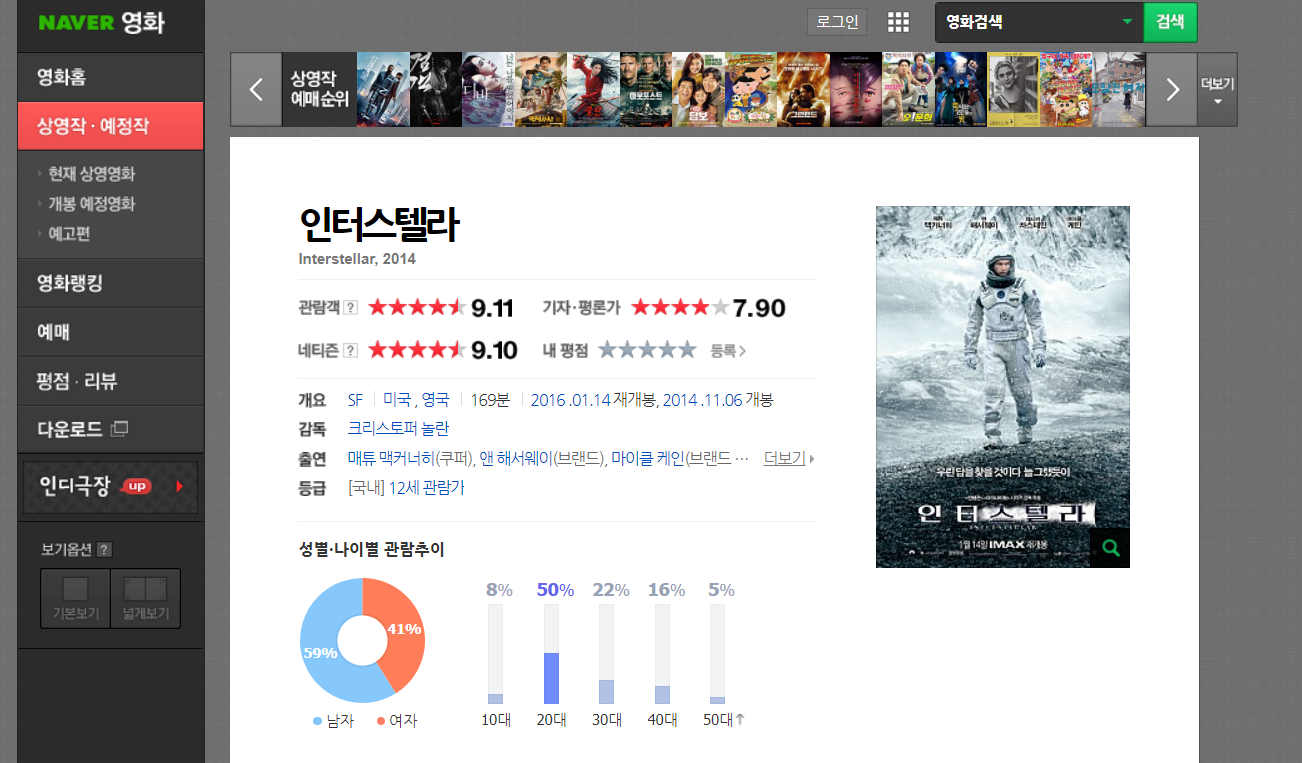

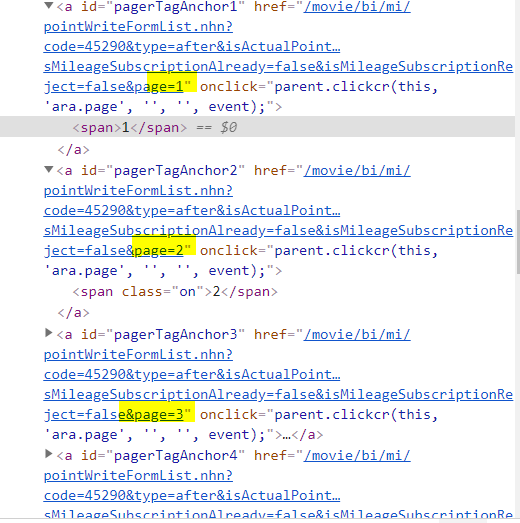

페이지가 위처럼 구성된 것을 확인

###  .strip() 앞뒤 공백 없애기

In [105]:
txt = '''

공백이 많은 문장

'''
print(txt)



공백이 많은 문장




In [106]:
txt = txt.strip()
txt

'공백이 많은 문장'

### 일련번호가 붙은 문자열 만들기

In [108]:
# 학번 13 ~ 학번 20까지 만들어보자.
std_no = []
std_no_pre = "학번"
for i in range(13,21):
    std_no.append(std_no_pre+str(i))
    
for no in std_no:
    print(no)

학번13
학번14
학번15
학번16
학번17
학번18
학번19
학번20


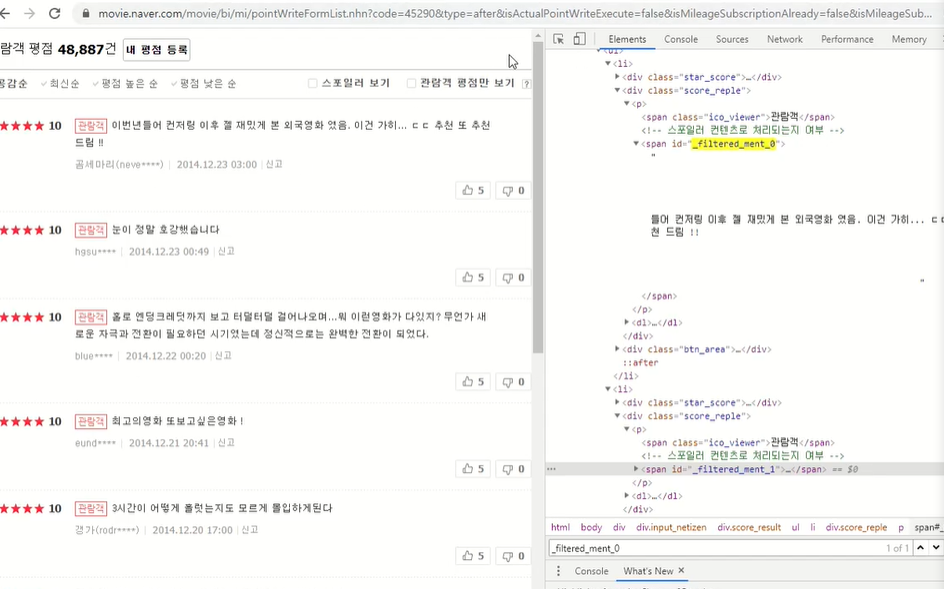

id 가 유일한 값이고 0~n 으로 구성됨.

In [26]:
id_list = []
id_pre = '_filtered_ment_'

for i in range(10):
    id_list.append(id_pre+str(i))
for i in id_list:
    print(i)

_filtered_ment_0
_filtered_ment_1
_filtered_ment_2
_filtered_ment_3
_filtered_ment_4
_filtered_ment_5
_filtered_ment_6
_filtered_ment_7
_filtered_ment_8
_filtered_ment_9


In [28]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=45290&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=100')
soup = BeautifulSoup(res.content, 'html.parser')

id_list = []
id_pre = '_filtered_ment_'

for i in range(10):
    id_list.append(id_pre+str(i))

mydata = []    
for id in id_list:    
    mydata.append(soup.find('span',{'id':id}).get_text())

for item in mydata:
    print(item.strip())


눈이 정말 호강했습니다
홀로 엔딩크레딧까지 보고 터덜터덜 걸어나오며...뭐 이런영화가 다있지?  무언가 새로운 자극과 전환이 필요하던 시기였는데 정신적으로는 완벽한 전환이 되었다.
최고의영화 또보고싶은영화 !
3시간이 어떻게 흘럿는지도 모르게 몰입하게된다
돈도 안아깝고 광해 이후로 처음으로 괜찮다라는 생각이 들음
공상 과학 영화  시간과 공간을 초월한 소재 구성?작가의 두뇌  회전  대단함
이런거 너무 좋아 ㅠㅠㅠㅠ 짱짱!
좋은 영화지만, 재미있지는 않았다.  이 영화를 만들수 있는 능력에는 감탄하지만, 놀란의 상상력이 너무 먼곳을 향하는 바람에 참신함, 기발함에서는 한발짝 물러서신 듯.
기대만큼은 아니었네요
몰입도 최고!!! 놀란감독 정말 대단한것같다.


# 과제 1 [네이버 영화 사이트에서 설국열차 평점, 리뷰 크롤링]

### [빅데이터분석 6주차 과제]경영정보학과 60161051 김동현

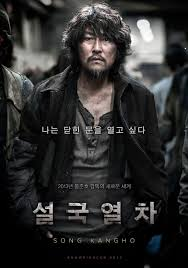

In [62]:
import requests
from bs4 import BeautifulSoup

url_pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=62328&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
id_list = []
id_pre = '_filtered_ment_'
        
for page in range(10):
    print('\n',page+1,"페이지\n")
    site = url_pre+str(page+1)  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    score_list = []
    scores = soup.find_all('div','star_score')
    for score in scores:
        score_list.append(score.get_text())
    
    for i in range(10):
        id_list.append(id_pre+str(i))

    mydata = []    
    for id in id_list:    
        mydata.append(soup.find('span',{'id':id}).get_text())
        
    for score, line in zip(score_list, mydata):
        print(score.strip(), line.strip())


 1 페이지

10 우리나라 사람들 수준이 그렇지 뭐. 웃음코드+감동+눈물자극 이 공식만 성립하면 평균9.5점은 무난히 찍지. 무겁고 냉철한 메세지가 내포되어있는 영화는싫어하는듯. 봉준호감독 작품답게 스토리속에 말하고자 하는 메세지가 ...
10 다들설국열차볼때 꼭양갱을사세욬ㅋㅋㅋ양갱드시면서봐보세욬ㅋㅋㅋㅋ
10 1점준 인간들은 7번방선물 보면서 감동했다고 10점 주겟지?
10 이 영화는 신세계다 이게바로 봉준호의 신세계
10 솔직히 말해서는 이 영화가 대중적이지는 않다. 하지만 영화속 메시지나, 인물들의 대사. 그런 것들이 너무나 인상깊었다. 언제까지 깡패영화만 만들꺼냐 한국. 이런 것도 한번 만들어봐야지
9 이 영화는 무시당할 수준의 영화가 아니다.
9 호불호가 갈릴거같다는건 인정해야한다하지만 나로썬 의미있게봣고 과잉메시지라기보단상징과은유로 확실히 와닿는메시지라 생각해본다.연출도좋앗고 부분부분 지리는장면이많다..
10 영화적 메시지가 돋보이네요. 한국영화도 이런 시도를 많이 해봐야죠
7 솔직히 전형적인 상업성을 가진 영화는 아닌거 같음
10 하 정말 이 영화는 단순히 여러분이 원하는 터지는 식의 흔한 쓰래기 할리우드 영화가 아닙니다 어느정도 오락성은 있지만 예술적으로 어두운 면도 갖추고 있다는 걸 염두해두세요 영화를 보다보면 깊은 메세지가 있습니다.

 2 페이지

10 김치 관객들의 영화 수준 :칠번방의선물,헬로우 고스트,늑대소년 죄다 슬퍼서 눈물흘리면서 평점은 10점주고 1000만관객 ㅋㅋㅋ해외에선 B~C급되는 영화가 한국에서 1000만관객...설국열차도 봐라 뜻도 이해못해서 무...
9 음 7점대 평점은 너무 낮은거 같은데 ? 호불호가 갈릴지도 모르겠으나, 전달하려는 메세지도 좋고 이야기 풀어나가는부분도 지루하게 느껴지지 않았고 !다만 아쉬운 부분은 송강호는 좀 영화내내 따로노는 느낌? 전반적으로 ...
7 쪼는 맛이 좀 덜해서 아쉽다.... 나름 재밌게 봤음.인류최초의 꼬리칸 부터 앞칸까지 모두가본건 주인공이 아닌 윌포드 여비서라는거ㅋㅋㅋ
10 설국

# 과제 2) [같은 영화를 다른 영화에서 검색하여 동일한 형태로 크롤링]

## 다음 영화를 통한 [설국열차] 리뷰정보 크롤링

In [30]:
import requests
from bs4 import BeautifulSoup

site_pre = 'https://movie.daum.net/moviedb/grade?movieId=42238&type=netizen&page='
        
for page in range(10):
    print('\n',page+1,"페이지\n")
    site = site_pre+str(page+1)  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    score_list = []
    scores = soup.find_all('em','emph_grade')
    for score in scores:
        score_list.append(score.get_text()) # 평점 크롤링
    
    review_list=[]
    reviews = soup.find_all('p','desc_review')
    for review in reviews:
        review_list.append(review.get_text()) # 리뷰 크롤링
    
    for score, review in zip(score_list, review_list):
        print(score.strip(), review.replace(" ",""))


 1 페이지

10 

9 
74퍼센트유지.타노스보다후하다.

10 
역대급

10 
.

7 
봉준호감독의아포칼립스세계관.

7 
설국열차로인해천재인정함정했는데

10 
잔인한장면이부담스러웠지만스토리도독특하고볼거리도많아서잼있었어요..지루하지않고내용전개가빨라서좋음..배우들도다연기잘하고볼만해요.미국에서드라마로리메이크한것도1회만봤는데잼있더라구요ㅎㅎㅎ

10 
봉준호대단한분이네요

2 
송강호매영화가똑같네

9 
봉준호


 2 페이지

9 

8 

8 

10 

10 

0 

10 
지금은에이트8책보고다시보니우리애들시절이걱정.

10 
재밌다

9 

10 
스토리창의적이다괜히칸이인정한감독이아니다


 3 페이지

2 
영화중한국인캐릭터들은너무조합이안됨.

10 
진짜걸작이네요..개인적으로기생충보다설국열차가더훌륭한거같아요!

10 
최고입니다

7 
봉준호는살인의추억이맞는것같다.---그냥만화로보는게나을듯

0 
진짜별로다...세계관어쩌고하는데...아진짜별로다...송강호등명품배우들가지고...그냥기념비적인영화라봐야할듯

0 
넘지루해삼일에걸쳐간신히봤네요

6 
나름신선한소재였던것같은데내용은기억이안난다.바퀴벌레로만든양갱만기억남...

9 
칸이너무많아..

7 
다소지루함아이디어는참신

8 
재개봉하는데,저도보고싶네요.부산에도재개봉했으면좋겠습니다.


 4 페이지

8 

10 
몰입감최고

7 
2시간에풀어내긴벅찬던듯하네요~인정

7 
여러번봤는데항상끝까지못보고...오늘은봉감독님때문에애정갖고끝까지보려구요.

10 
그저불편하기따름....스토피아!

7 
기생충이설국열차까지타게만드네.쩌는캐스팅에비해좀...

10 
마치자본주의열차를탄인류와그시스템을위해후진국아동노동착취가떠올랐다.마지막충격을준반전은길리암의희생으로커티스가깨어나고다시본인의희생으로기꺼이아이를구하고.마치한국사회정치적희생으로깨어난시민들이떠올라서눈물이났다.감독의도는아니더라도내가본세상에서그렇게보였다.열차가결국탈선해버리고진실에다가가기위한피흘린가치는있었을까?생각에혼란이오지만끝없이물음을던지는영화.

8 
캐스팅개쩔었

In [19]:
import requests
from bs4 import BeautifulSoup

site_pre = 'https://movie.daum.net/moviedb/grade?movieId=42238&type=netizen&page='
        
for page in range(10):
    print('\n',page+1,"페이지\n")
    site = site_pre+str(page+1)  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    score_list = []
    scores = soup.find_all('em','emph_grade')
    for score in scores:
        score_list.append(score.get_text()) # 평점 크롤링
    
    review_list=[]
    reviews = soup.find_all('p','desc_review')
    for review in reviews:
        review_list.append(review.get_text()) # 리뷰 크롤링
    
    for score, review in zip(score_list, review_list):
        print(score.strip(), review.strip())


 1 페이지

10 
9 74퍼센트 유지. 타노스보다 후하다.
10 역대급
10 .
7 봉준호 감독의 아포칼립스 세계관.
설국열차로 인해 천재 인정함정했는데  봤슴
10 잔인한 장면이 부담스러웠지만 스토리도 독특하고 볼거리도 많아서 잼있었어요..지루하지 않고 내용전개가 빨라서 좋음..배우들도 다 연기 잘하고 볼만해요. 미국에서 드라마로 리메이크한것도 1회만 봤는데 잼있더라구요 ㅎㅎㅎ
봉준호 대단한 분이네요었어요  
송강호 매영화가 똑같네
9 봉준호

 2 페이지

9 
8 
8 
10 
10 
0 
지금은 에이트 8 책보고 다시 보니 우리 애들시절이 걱정.
10 재밌다
9 
10 스토리 창의적이다 괜히 칸이 인정한 감독이 아니다

 3 페이지

2 영화중 한국인 캐릭터들은 너무 조합이 안됨.
10 진짜 걸작이네요..개인적으로 기생충보다 설국열차가 더 훌륭한거 같아요!
10 최고입니다
7 봉준호는 살인의추억이 맞는것 같다 .---그냥 만화로 보는게 나을듯
0 진짜 별로다... 세계관 어쩌고 하는데... 아 진짜 별로다...송강호 등 명품배우들 가지고 ... 그냥 기념비 적인 영화라 봐야할듯
넘 지루해 삼일에 걸쳐 간신히 봤네요
6 나름 신선한 소재였던 것 같은데 내용은 기억이 안난다. 바퀴벌레로 만든 양갱만 기억남...
9 칸이너무많아..
7 다소 지루함 아이디어는 참신
재개봉 하는데, 저도 보고 싶네요. 부산에도 재개봉 했으면 좋겠습니다.

 4 페이지

8 
10 몰입감 최고
2시간에 풀어내긴 벅찬던 듯 하네요~은 인정
7 여러번 봤는데 항상 끝까지 못보고...   오늘은 봉감독님때문에 애정 갖고 끝까지 보려구요.
그저 불편하기 따름 . . . 디스토피아!
7 기생충이 설국열차까지 타게 만드네. 쩌는 캐스팅에 비해 좀...
10 마치 자본주의 열차를 탄 인류와 그 시스템을 위해 후진국 아동노동 착취가 떠올랐다.  마지막 충격을 준 반전은 길리암의 희생으로 커티스가 깨어나고  다시 본인의 희생으로 기꺼이 아이를 구하고.  마치 한국사회 정치적 희생으로 깨어난

In [1]:
import requests
from bs4 import BeautifulSoup

site_pre = 'https://movie.daum.net/moviedb/grade?movieId=42238&type=netizen&page='
        
for page in range(10):
    print('\n',page+1,"페이지\n")
    site = site_pre+str(page+1)  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    score_list = []
    scores = soup.find_all('em','emph_grade')
    for score in scores:
        score_list.append(score.get_text()) # 평점 크롤링
    
    review_list=[]
    reviews = soup.find_all('p','desc_review')
    for review in reviews:
        review_list.append(review.get_text()) # 리뷰 크롤링
    
    for score, review in zip(score_list, review_list):
        print(score.strip(), review.split())


 1 페이지

10 []
9 ['74퍼센트', '유지.', '타노스보다', '후하다.']
10 ['역대급']
10 ['.']
7 ['봉준호', '감독의', '아포칼립스', '세계관.']
7 ['미국판', '설국', '열차', '먼저', '보고', '이제', '봤슴', '기생충은', '쓰레기', '영화라고', '단정했는데', '아카데미상을', '받고....', '설국열차로', '인해', '천재', '인정함']
10 ['잔인한', '장면이', '부담스러웠지만', '스토리도', '독특하고', '볼거리도', '많아서', '잼있었어요..지루하지', '않고', '내용전개가', '빨라서', '좋음..배우들도', '다', '연기', '잘하고', '볼만해요.', '미국에서', '드라마로', '리메이크한것도', '1회만', '봤는데', '잼있더라구요', 'ㅎㅎㅎ']
10 ['무서웠지만', '재밌었어요', '봉준호', '대단한', '분이네요']
2 ['정도껏', '말이되야지', '수족관', '인상적이다', '송강호', '매영화가', '똑같네']
9 ['봉준호']

 2 페이지

9 []
8 []
8 []
10 []
10 []
0 []
10 ['7년전에', '봤을', '땐', '최고.', '지금은', '에이트', '8', '책보고', '다시', '보니', '우리', '애들시절이', '걱정.']
10 ['재밌다']
9 []
10 ['스토리', '창의적이다', '괜히', '칸이', '인정한', '감독이', '아니다']

 3 페이지

2 ['영화중', '한국인', '캐릭터들은', '너무', '조합이', '안됨.']
10 ['진짜', '걸작이네요..개인적으로', '기생충보다', '설국열차가', '더', '훌륭한거', '같아요!']
10 ['최고입니다']
7 ['봉준호는', '살인의추억이', '맞는것', '같다', '.---그냥', '만화로', '보는게', '나을듯']
0 ['진짜', '별로다...', '세계관', '어쩌고', '하는데...', '아', '진짜', '별로다...송강호',

In [63]:
import requests
from bs4 import BeautifulSoup

url_pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=45290&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page='
id_list = []
id_pre = '_filtered_ment_'
        
for page in range(10):
    print('\n',page+1,"페이지\n")
    site = url_pre+str(page+1)  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    score_list = []
    scores = soup.find_all('div','star_score')
    for score in scores:
        score_list.append(score.get_text())
    
    for i in range(10):
        id_list.append(id_pre+str(i))

    mydata = []    
    for id in id_list:    
        mydata.append(soup.find('span',{'id':id}).get_text())
        
    for score, line in zip(score_list, mydata):
        print(score.strip(), line.strip())


 1 페이지

10 인셉션은 대단하다 느꼈는데, 인터스텔라는 경이롭다고 느껴진다.
10 결론만 말하자면 대박이다 더이상 어떤단어로 칭찬해야하는지도모르겠다.약 3시간의 긴러닝타임이지만 시간가는줄도 모르고봤고  모든상황이 다 연결되어있는 아주 짜임새있는 영화다.내가 살면서 이런명작을 몇번을 더 볼수있을지 ...
10 전율과 환희의 169분이였다. 그 어떤 영화도 시도한 적 없는 명석함과 감동이 담겨 있었다. 이 영화를 만들어낸 놀란의 야심과 능력이 존경스럽다
10 다크나이트 라이즈에 6점을 줬던 박평식이 7점을 줬다.
10 이 영화가 명량이나 도둑들보다 관객수가 적다면 진짜 부끄러울듯
10 팝콘, 콜라 사가지 마라.. 먹을시간 없다
10 안보면 죽을지도 모릅니다... 꼭 봐야합니다...
10 무슨 말이 필요한가 ...나중에 커서 아들낳으면 아빠는 인터스텔라 영화관에서 봤어 라고 자랑할생각하니 기쁘다..ㅎ
10 여친이 옆에서 자고 일어나더니, 평점 7점짜리 영화라네요. 잠깐 헤어질까 생각했습니다.
10 우주인 인성검사의 중요성을 절실히 느낌

 2 페이지

10 1년 6개월을 손꼽아 기다린 보람이 있는 영화였습니다평점이 무슨 의미가 있나요 이런 영화를 만들어준 놀란 감독님과 스텝들에게 경의를 표합니다
10 이 영화를 보고 2번 놀랐다아니, 사람이 어떻게 이런걸 생각해 낼 수가 있지?아니, 그걸 어떻게 이렇게 가시적으로 표현해 낼 수가 있지?
10 마지막 40분은 입벌리면서 보게됨
10 인셉션이 인간 내면세계의 끝을 보여주었다면인터스텔라는 우주의 끝을 보여주었다.
10 왜10점밖에 없는거냐 네이버 이놈아
10 드디어, 영화가 여기까지 왔다.
10 놀란이 자기 자신에게 바치고도 '놀란' 최고의 선물
10 아카데미 기본 5관왕은 먹고들어갈거같다
9 블랙홀도 '사랑'은 빨아들이지 못했다
10 초반 중반 후반 한번씩 총 세번 눈물 바가지로 흘렷다

 3 페이지

10 평론가?ㅋㅋ너네가누굴 평가하냐그누구도.이영화를 평가할수없다
10 내 삶중 역대 최고였다.. 진짜 전율을 일

In [83]:
import requests
from bs4 import BeautifulSoup

url_pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=45290&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page='
id_list = []
id_pre = '_filtered_ment_'
final_data = []

for page in range(10):
    site = url_pre+str(page+1)  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    score_list = []
    scores = soup.find_all('div','star_score')
    for score in scores:
        score_list.append(score.get_text())
    
    for i in range(10):
        id_list.append(id_pre+str(i))

    mydata = []    
    for id in id_list:    
        mydata.append(soup.find('span',{'id':id}).get_text())

    for score, line in zip(score_list, mydata):
        final_data.append([score.strip(), line.strip()])
        
pd.DataFrame(final_data)

,0,1
0,10,"인셉션은 대단하다 느꼈는데, 인터스텔라는 경이롭다고 느껴진다."
1,10,결론만 말하자면 대박이다 더이상 어떤단어로 칭찬해야하는지도모르겠다.약 3시간의 긴러...
2,10,전율과 환희의 169분이였다. 그 어떤 영화도 시도한 적 없는 명석함과 감동이 담겨...
3,10,다크나이트 라이즈에 6점을 줬던 박평식이 7점을 줬다.
4,10,이 영화가 명량이나 도둑들보다 관객수가 적다면 진짜 부끄러울듯
...,...,...
95,10,믿고보는 크리스토퍼 놀란의 인터스텔라 긴 러닝타임이 믿기지않을만큼 영화의 구성도좋고...
96,10,인간의 상상력이 어디가 끝이냐고 물으면 이 영화가 답일듯...거의 3시간의 긴 런타...
97,10,인터스텔라를 다운받아보거나 채널씨지비에서 보려는 어리석은 짓은 하지말았으면....
98,10,엔딩크레딧이 올라갈때 의자에 기대고 있지 않았다는 사실을 깨달음


In [80]:
final_data = []

for score, line in zip(score_list, mydata):
    final_data.append([score.strip(), line.strip()])
    
import pandas as pd

pd.DataFrame(final_data)

,0,1
0,10,사전정보를 알고 봤기에고 재미를 떠나서 정말 집중해서 봤습니다ㅎ정말 영화 잘 만들었...
1,10,아이맥스에서.최대한 큰관에서 보세요진짜 영화계에 한획긋는다
2,10,쩖....끝나고 현자타임이 오네요
3,10,... 전재산 8000원이 있다면 이영화를 위해 써라. 돈이없으면 입고있는 옷이라도...
4,10,6점을 준 전문가분께 한마디 하고 싶네요... 과학문제를 풀다가 안되면 마술놀이라고...
5,10,믿고보는 크리스토퍼 놀란의 인터스텔라 긴 러닝타임이 믿기지않을만큼 영화의 구성도좋고...
6,10,인간의 상상력이 어디가 끝이냐고 물으면 이 영화가 답일듯...거의 3시간의 긴 런타...
7,10,인터스텔라를 다운받아보거나 채널씨지비에서 보려는 어리석은 짓은 하지말았으면....
8,10,엔딩크레딧이 올라갈때 의자에 기대고 있지 않았다는 사실을 깨달음
9,10,내따위가 판단할수잇는 영화가 아니다.내아는 지인 모두가 다 봣으면 한다.늦은밤 잠을...
